In [144]:
!ls ../../../datos/C522

3D.json				     mprage_brain_jp.nii.gz
f1.nii.gz			     mprage_brain_jp_outskin_mask.nii.gz
f2.nii.gz			     mprage_brain_jp_outskin_mesh.nii.gz
FMRI2.json			     mprage_brain_jp_outskin_mesh.vtk
FMRI.json			     mprage_brain_jp_outskull_mask.nii.gz
FMRI.nii.gz			     mprage_brain_jp_outskull_mesh.nii.gz
mprage_brain_jp_inskull_mask.nii.gz  mprage_brain_jp_outskull_mesh.vtk
mprage_brain_jp_inskull_mesh.nii.gz  mprage_brain_jp_skull_mask.nii.gz
mprage_brain_jp_inskull_mesh.vtk     mprage.nii.gz
mprage_brain_jp_mesh.vtk


In [145]:
!ls ../../../datos/TEMPLATES

Buckner_JNeurophysiol11_MNI152.zip
Cerebellum-MNIflirt-maxprob-thr0-1mm.nii.gz
Cerebellum-MNIflirt-maxprob-thr0-2mm.nii.gz
Cerebellum-MNIflirt-maxprob-thr25-1mm.nii.gz
Cerebellum-MNIflirt-maxprob-thr25-2mm.nii.gz
Cerebellum-MNIflirt-maxprob-thr50-1mm.nii.gz
Cerebellum-MNIflirt-maxprob-thr50-2mm.nii.gz
Cerebellum-MNIflirt-prob-1mm.nii.gz
Cerebellum-MNIflirt-prob-2mm.nii.gz
Cerebellum_MNIflirt.xml
Cerebellum-MNIfnirt-maxprob-thr0-1mm.nii.gz
Cerebellum-MNIfnirt-maxprob-thr0-2mm.nii.gz
Cerebellum-MNIfnirt-maxprob-thr25-1mm.nii.gz
Cerebellum-MNIfnirt-maxprob-thr25-2mm.nii.gz
Cerebellum-MNIfnirt-maxprob-thr50-1mm.nii.gz
Cerebellum-MNIfnirt-maxprob-thr50-2mm.nii.gz
Cerebellum-MNIfnirt-prob-1mm.nii.gz
Cerebellum-MNIfnirt-prob-2mm.nii.gz
Cerebellum_MNIfnirt.xml
MNI152_T1_1mm_brain.nii.gz
MNI152_T1_1mm.nii.gz
MNI152_T1_3mm_brain.nii.gz
MNI152_T1_3mm.nii.gz
suit_v3.3.zip


In [63]:
from nipype.interfaces.fsl import preprocess
from nilearn import plotting
%matplotlib inline

In [146]:
id="C575"
anat_filename = "../../../datos/"+id+"/mprage.nii.gz"
bold_filename = "../../../datos/"+id+"/f1.nii.gz"

brain_filename = "../../../datos/"+id+"/mprage_brain_jp.nii.gz"
brain_mni_filename = "../../../datos/"+id+"/mprage_brain_jp_mni.nii.gz"
mni_template = "../../../datos/TEMPLATES/MNI152_T1_1mm.nii.gz"

preproc_anat_filename = "_session_id_1_subject_id_"+id+"/skull_strip/mprage_brain.nii.gz"

/opt/miniconda-latest/envs/elekin/lib/python3.7/site-packages/nilearn/image/resampling.py:510: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


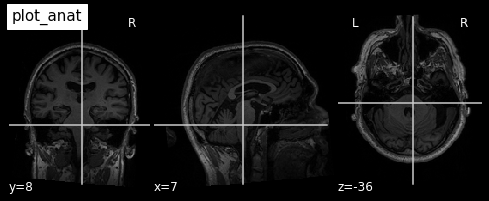

In [128]:
plotting.plot_anat(anat_filename, title="plot_anat")

In [131]:
rfov = fsl.RobustFOV(in_file=anat_filename)
fov_res = rfov.run()

191013-01:15:14,832 nipype.interface INFO:
	 stdout 2019-10-13T01:15:14.829865:Final FOV is: 
191013-01:15:14,848 nipype.interface INFO:
	 stdout 2019-10-13T01:15:14.829865:0.000000 144.000000 0.000000 192.000000 28.000000 136.000000 
191013-01:15:14,851 nipype.interface INFO:
	 stdout 2019-10-13T01:15:14.829865:


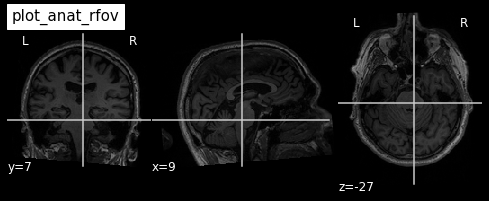

In [132]:
plotting.plot_anat(fov_res.outputs.out_roi, title="plot_anat_rfov")

In [133]:
flt = fsl.FLIRT(bins=640, cost_func='mutualinfo')
flt.inputs.in_file = fov_res.outputs.out_roi
flt.inputs.reference = mni_template
flt.inputs.output_type = "NIFTI_GZ"
res = flt.run() #doctest: +SKIP

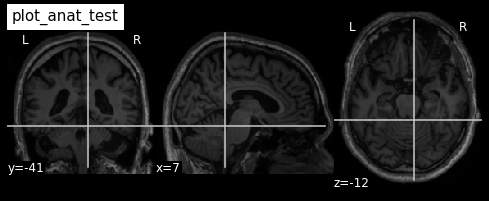

In [134]:
plotting.plot_anat(res.outputs.out_file, title="plot_anat_test")

In [135]:
bet = preprocess.BET()
bet.inputs.in_file=res.outputs.out_file
bet.inputs.out_file=brain_filename
bet.inputs.frac = 0.4
bet.inputs.robust = True
bet.verbose=True

In [136]:
result = bet.run()

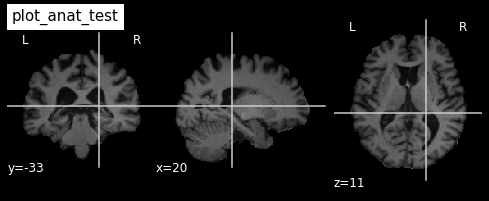

In [137]:
plotting.plot_anat(result.outputs.out_file, title="plot_anat_test")

In [151]:
flt = fsl.FLIRT(bins=640, cost_func='mutualinfo')
flt.inputs.in_file = bold_filename
flt.inputs.reference = mni_template
flt.inputs.output_type = "NIFTI_GZ"
res2 = flt.run() #doctest: +SKIP

191013-05:42:06,280 nipype.interface INFO:
	 stderr 2019-10-13T05:42:06.275161:Image Exception : #75 :: 3D only method called by higher-dimensional volume.
191013-05:42:06,709 nipype.interface INFO:
	 stderr 2019-10-13T05:42:06.706753:3D only method called by higher-dimensional volume.


FileNotFoundError: No such file or directory '/home/elekin/results/output/preproc/f1_flirt.nii.gz' for output 'out_file' of a FLIRT interface

In [ ]:
from nilearn import image
mean_img = image.mean_img(res2.outputs.out_file)
plotting.plot_img(mean_img)